In [1]:
# Dependencies
import tweepy   # twitter api
import csv
import pandas as pd                          # data analysis (dataframes, read file)
import numpy as np                           # arrays and linear algebra
from IPython.display import display          # print output in tabular format
import matplotlib.pyplot as plt              # for 2D plotting
import nltk

In [2]:
#Read csv file into dataframe

crypto = pd.read_csv('crypt.csv', names = ["Tweets","Date","Likes","Retweets","Hashtag"])
print (crypto.head(10))

                                              Tweets                 Date  \
0  b'RT @MikeQuindazzi: 1,006 #blockchain technol...  2018-06-22 10:19:39   
1  b'RT @andi_staub: Women In #Blockchain; The Wh...  2018-06-22 10:19:25   
2  b'RT @stawealthadv: For those that invest in #...  2018-06-22 10:19:21   
3  b'RT @PumpUpBTC: Ethereum Classic Price Defies...  2018-06-22 10:19:18   
4  b'RT @parschain: Only a few hours, and our \xe...  2018-06-22 10:19:18   
5  b'RT @BitcoinPablito: #DeepOnion will moon soo...  2018-06-22 10:19:00   
6  b'RT @BitcoinPablito: #DeepOnion will moon soo...  2018-06-22 10:18:55   
7  b'RT @BitcoinPablito: #DeepOnion will moon soo...  2018-06-22 10:18:47   
8  b'RT @KureCoinHub: #kurechain vision\n\n #kure...  2018-06-22 10:18:39   
9  b'RT @crypto_rand: I just published \xe2\x80\x...  2018-06-22 10:18:02   

   Likes  Retweets            Hashtag  
0      0        34  #cryptocurrencies  
1      0        40  #cryptocurrencies  
2      0         1  #cryptocurre

In [3]:
## Clean and Sentiment Analysis the Tweet

from textblob import TextBlob                    # library for processing textual data          
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    

def get_polarity(tweet):                         # getting the polarity of each tweet after analysing it
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:          #polarity tells whether the tweet is postive/ negative/ neutral
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [4]:
crypto['Sentiment'] = np.array([ get_polarity(tweet) for tweet in crypto['Tweets'] ])

In [5]:
## Print top 10 tweets and check Sentiment field added
print(crypto.head(10))

                                              Tweets                 Date  \
0  b'RT @MikeQuindazzi: 1,006 #blockchain technol...  2018-06-22 10:19:39   
1  b'RT @andi_staub: Women In #Blockchain; The Wh...  2018-06-22 10:19:25   
2  b'RT @stawealthadv: For those that invest in #...  2018-06-22 10:19:21   
3  b'RT @PumpUpBTC: Ethereum Classic Price Defies...  2018-06-22 10:19:18   
4  b'RT @parschain: Only a few hours, and our \xe...  2018-06-22 10:19:18   
5  b'RT @BitcoinPablito: #DeepOnion will moon soo...  2018-06-22 10:19:00   
6  b'RT @BitcoinPablito: #DeepOnion will moon soo...  2018-06-22 10:18:55   
7  b'RT @BitcoinPablito: #DeepOnion will moon soo...  2018-06-22 10:18:47   
8  b'RT @KureCoinHub: #kurechain vision\n\n #kure...  2018-06-22 10:18:39   
9  b'RT @crypto_rand: I just published \xe2\x80\x...  2018-06-22 10:18:02   

   Likes  Retweets            Hashtag  Sentiment  
0      0        34  #cryptocurrencies          0  
1      0        40  #cryptocurrencies          0  

In [7]:
## Classifying the tweets

positive_tweets = [ tweet for index, tweet in enumerate(crypto['Tweets']) if crypto['Sentiment'][index] > 0]
neutral_tweets = [ tweet for index, tweet in enumerate(crypto['Tweets']) if crypto['Sentiment'][index] == 0]
negative_tweets = [ tweet for index, tweet in enumerate(crypto['Tweets']) if crypto['Sentiment'][index] < 0]      

positive_data = pd.DataFrame (data = [ tweet for index, tweet in enumerate(crypto['Tweets']) if crypto['Sentiment'][index] > 0])
neutral_data = [ tweet for index, tweet in enumerate(crypto['Tweets']) if crypto['Sentiment'][index] == 0]
negative_data = [ tweet for index, tweet in enumerate(crypto['Tweets']) if crypto['Sentiment'][index] < 0] 

In [8]:
positive_data

,0
0,b'RT @PumpUpBTC: Ethereum Classic Price Defies...
1,"b'RT @parschain: Only a few hours, and our \xe..."
2,b'RT @BitcoinPablito: #DeepOnion will moon soo...
3,b'RT @BitcoinPablito: #DeepOnion will moon soo...
4,b'RT @BitcoinPablito: #DeepOnion will moon soo...
5,b'RT @BitcoinPablito: #DeepOnion will moon soo...
6,b'RT @parschain: Only 24 hours and our #Airdro...
7,b'RT @CybitCorp: Read more about it at https:/...
8,b'RT @ICOINGOT: INGOT Coin PRE-ICO is Live to ...
9,b'RT @justinsuntron: Our #hodlers are two time...


In [9]:
## Print the positive tweets

print(positive_tweets[:10])

["b'RT @PumpUpBTC: Ethereum Classic Price Defies Bear Market in Single-Day Rally https://t.co/QVQsY14FeW - $BTC #bitcoin #news #cryptocurrency\\xe2\\x80\\xa6'", "b'RT @parschain: Only a few hours, and our \\xe2\\x98\\x84\\xef\\xb8\\x8f#Airdrop\\xe2\\x98\\x84\\xef\\xb8\\x8f campaign will come to the end. Don\\xe2\\x80\\x99t miss this opportunity to earn 200 free Pars! Ref\\xe2\\x80\\xa6'", "b'RT @BitcoinPablito: #DeepOnion will moon soon, right after incredible incoming news and the #DeepSend feature introduction. You should buy\\xe2\\x80\\xa6'", "b'RT @BitcoinPablito: #DeepOnion will moon soon, right after incredible incoming news and the #DeepSend feature introduction. You should buy\\xe2\\x80\\xa6'", "b'RT @BitcoinPablito: #DeepOnion will moon soon, right after incredible incoming news and the #DeepSend feature introduction. You should buy\\xe2\\x80\\xa6'", "b'RT @BitcoinPablito: #DeepOnion will moon soon, right after incredible incoming news and the #DeepSend feature introduction. Y

In [10]:
sentiment_count = crypto['Sentiment'].value_counts()
sentiment_count

 1    58488
 0    49010
-1    11078
Name: Sentiment, dtype: int64

In [11]:
crypto['Hashtag'].value_counts()

#cryptocurrencies    32217
#cryptocurrency      27862
#mining              25825
#blockchain          19035
#crypto              13637
Name: Hashtag, dtype: int64

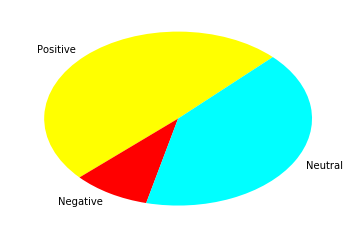

In [25]:
#Visualization of sentiment of tweets

size = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
colors = ['yellow', 'red', 'cyan']
labels = 'Positive', 'Negative', 'Neutral'

plt.pie(
   x=size,
   colors=colors,
   labels=labels,
   startangle=45
)
plt.show()

In [16]:
# Print a tweet and its sentiment to check whether analysis is correct

crypto["Tweets"][5]

"b'RT @BitcoinPablito: #DeepOnion will moon soon, right after incredible incoming news and the #DeepSend feature introduction. You should buy\\xe2\\x80\\xa6'"

In [17]:
crypto["Sentiment"][5]

1

In [13]:
positive_data.columns = ['Text']

In [14]:
positive_data['Text'].head(10)

0    b'RT @PumpUpBTC: Ethereum Classic Price Defies...
1    b'RT @parschain: Only a few hours, and our \xe...
2    b'RT @BitcoinPablito: #DeepOnion will moon soo...
3    b'RT @BitcoinPablito: #DeepOnion will moon soo...
4    b'RT @BitcoinPablito: #DeepOnion will moon soo...
5    b'RT @BitcoinPablito: #DeepOnion will moon soo...
6    b'RT @parschain: Only 24 hours and our #Airdro...
7    b'RT @CybitCorp: Read more about it at https:/...
8    b'RT @ICOINGOT: INGOT Coin PRE-ICO is Live to ...
9    b'RT @justinsuntron: Our #hodlers are two time...
Name: Text, dtype: object

In [28]:
import string
from collections import Counter
from nltk.tokenize import TweetTokenizer #specially to handle tweets into documents
from nltk.corpus import stopwords # to remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import wordnet

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    #text = text.lower() # for normalization
    text = ' '.join(text).lower()
    tokens = tokenizer.tokenize(text)
    return [t for t in tokens if not t in stopwords and not t.isdigit()]

tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['b','n','co','get','new','us','join','versaratrade','rt','via', '...','b\'rt','https','#versaratrade','@versaratrade','@', '#', 'amp', 'http', '/', '://', '_',]
tf = Counter()
tokens = process(text=positive_data['Text'],tokenizer=tweet_tokenizer,stopwords=stopword_list)
tf.update(tokens)
for tag, count in tf.most_common(50):
        print("{}: {}".format(tag, count))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saraf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
xe2: 62421
x80: 60899
xa6: 50510
xf0: 16373
x9f: 13106
#blockchain: 8869
x8f: 6628
#cryptocurrency: 6056
#crypto: 4851
:/: 4630
x9d: 4467
#mining: 4315
xb8: 4312
xef: 4278
nhttps: 4088
live: 3960
#airdrop: 3849
first: 3767
platform: 3683
#cryptocurrencies: 3594
token: 3497
x90: 3351
#ico: 3315
:\: 3098
#bitcoin: 2799
x8d: 2642
information: 2586
like: 2573
blockchain: 2493
release: 2449
tomorrow: 2412
#ethereum: 2404
page: 2384
mining: 2378
x92: 2363
ico: 2341
x9a: 2330
landing: 2286
earlier: 2282
crypto: 2211
x93: 2190
airdrop: 2169
x99: 2157
tokens: 2142
available: 2071
project: 2043
great: 1998
check: 1996
free: 1947
eth: 1928


Text(0,0.5,'Frequency')

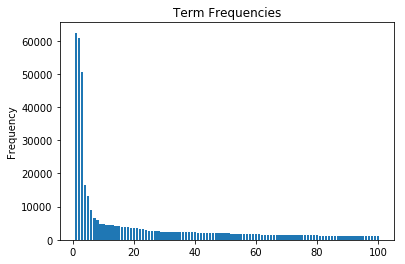

In [29]:
import matplotlib.pyplot as plt
y = [count for tag, count in tf.most_common(100)]
x = range(1, len(y)+1)
plt.bar(x, y)
plt.title("Term Frequencies")
plt.ylabel("Frequency")

#There are a few words with very high frequency and then the plots are almost of the same height.
#This indicates that there are few words that are very commonly used in tweets.

In [30]:
#from wordcloud import *
from nltk.tokenize import wordpunct_tokenize
from subprocess import check_output

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    text = ' '.join(text).lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if not tok in stopwords and not tok.isdigit()]

tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['b','n','co','versaratrade','get','new','us','join','rt','via', '...','b\'rt','https','#versaratrade','@versaratrade','@', '#', 'amp', 'http', '/', '://', '_',]
series_tweets = positive_data['Text']
tweet_str = series_tweets.str.cat(sep = ' ')
list_of_words = [i.lower() for i in wordpunct_tokenize(tweet_str) if i.lower() not in stopword_list and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('blockchain', 12095), ('cryptocurrency', 7757), ('ico', 7415), ('crypto', 7321), ('mining', 6787), ('airdrop', 6212), ('cryptocurrencies', 5078), ('xef', 4281), ('nhttps', 4148), ('live', 4089), ('first', 3856), ('token', 3756), ('bitcoin', 3755), ('platform', 3718), ('ethereum', 2742), ('information', 2616), ('like', 2596), ('follow', 2560), ('eth', 2531), ('world', 2461), ('release', 2451), ('tomorrow', 2417), ('tokens', 2397), ('page', 2385), ('landing', 2286), ('earlier', 2282), ('free', 2178), ('great', 2104), ('check', 2098), ('project', 2077), ('available', 2071), ('coin', 2067), ('bounty', 2061), ('eharvesthub', 1939), ('pre', 1891), ('btc', 1862), ('know', 1813), ('win', 1811), ('sale', 1685), ('time', 1679), ('read', 1665), ('icoingot', 1637), ('blockchaintechnology', 1636), ('june', 1584), ('one', 1571), ('retweet', 1570), ('news', 1554), ('team', 1506), ('node', 1473), ('good', 1470)]


In [31]:
mostcom = str(mostcommon)

In [32]:
data_new = pd.DataFrame(mostcommon, columns = ['word','frequency'])

In [33]:
data_new.head(10)

,word,frequency
0,blockchain,12095
1,cryptocurrency,7757
2,ico,7415
3,crypto,7321
4,mining,6787
5,airdrop,6212
6,cryptocurrencies,5078
7,xef,4281
8,nhttps,4148
9,live,4089


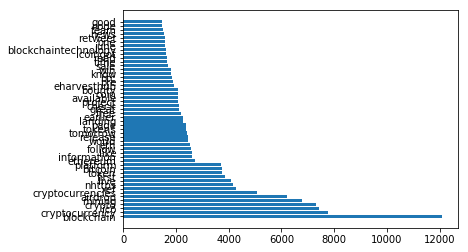

In [34]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

In [35]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

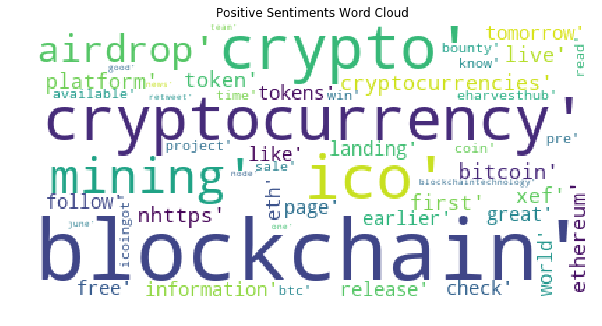

In [36]:

wordcloud = WordCloud(max_font_size=60
                      , background_color="white"
                      , stopwords=stopword_list
                      , collocations=False).generate(mostcom)

# Display the generated image with matplotlib 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title('Positive Sentiments Word Cloud')
plt.savefig("wordcloud.png")
plt.axis("off")